<a href="https://colab.research.google.com/github/Hilmihibatullah1/PengenalanPython/blob/main/Laptop_Price_Recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

Data Exploration

In [ ]:
data = pd.read_csv('/content/Final_Dataframe.csv')
df = pd.DataFrame(data)

In [ ]:
(df.head())


,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


In [ ]:
df.shape

(205, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           205 non-null    object 
 1   laptop_name     204 non-null    object 
 2   display_size    205 non-null    float64
 3   processor_type  205 non-null    object 
 4   graphics_card   205 non-null    object 
 5   disk_space      205 non-null    object 
 6   discount_price  205 non-null    float64
 7   old_price       205 non-null    float64
 8   ratings_5max    205 non-null    object 
dtypes: float64(3), object(6)
memory usage: 14.5+ KB


In [ ]:
df.duplicated().sum()

11

In [ ]:
df.isnull().sum()


brand             0
laptop_name       1
display_size      0
processor_type    0
graphics_card     0
disk_space        0
discount_price    0
old_price         0
ratings_5max      0
dtype: int64

In [ ]:
# Lakukan encoding pada kolom 'processor_type' , 'graphics_card' , 'brand', 'disk_space'. 'ratings_5max'
label_encoder_brand = LabelEncoder()
label_encoder_processor_type = LabelEncoder()
label_encoder_graphics_card = LabelEncoder()
label_encoder_disk_space = LabelEncoder()

df['brand'] = label_encoder_brand.fit_transform(df['brand'])
df['processor_type'] = label_encoder_processor_type.fit_transform(df['processor_type'])
df['graphics_card'] = label_encoder_graphics_card.fit_transform(df['graphics_card'])
df['disk_space'] = label_encoder_disk_space.fit_transform(df['disk_space'])

In [ ]:
df

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,4,Notebook 14-df0008nx,14.0,4,17,28,1259.0,1259.0,0 / 5
1,6,IdeaPad 330S-14IKB,14.0,14,29,0,1849.0,2099.0,3.3 / 5
2,5,MateBook D Volta,14.0,14,44,19,2999.0,3799.0,0 / 5
3,3,Inspiron 15 3567,15.6,8,20,0,1849.0,1849.0,0 / 5
4,2,VivoBook 15 X510UR,15.6,22,30,0,2499.0,3149.0,0 / 5
...,...,...,...,...,...,...,...,...,...
200,6,IdeaPad 320-15IKBRN,15.6,14,11,0,2099.0,2099.0,3.8 / 5
201,5,MateBook D,15.6,22,44,10,3299.0,3299.0,4.0 / 5
202,1,MacBook Pro (Retina + Touch Bar),15.4,16,50,19,10199.0,10199.0,0 / 5
203,1,MacBook Pro (Retina + Touch Bar),15.4,16,51,27,11899.0,11899.0,4.4 / 5


In [ ]:
# Pisahkan fitur dan label
X = df.drop(['old_price','laptop_name','discount_price','ratings_5max'], axis=1)
y = df['old_price']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Model KNN Regressor

In [ ]:
# Inisialisasi model regresi KNN
knn = KNeighborsRegressor(n_neighbors=3)

# Melatih model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# Prediksi harga untuk data uji
y_pred = knn.predict(X_test)


## Evaluasi Model

In [ ]:
# Hitung dan cetak nilai MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2227889.3821747964


In [ ]:
# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

RMSE: 1492.611597896384


In [ ]:
# Meminta input dari pengguna
nama_brand = str(input("Masukkan nama brand: "))
ukuran_layar = float(input("Masukkan ukuran layar (inch): "))
jenis_prosesor = str (input("Masukkan jenis prosesor: "))
graphic_card = str (input("Masukkan tipe kartu grafis: "))
disk_space = str (input("Masukkan disk space: "))

Masukkan nama brand: HP
Masukkan ukuran layar (inch): 14
Masukkan jenis prosesor:  Intel Celeron N4000
Masukkan tipe kartu grafis:  Intel HD Graphics 600
Masukkan disk space:  64 GB (eMMC)


In [ ]:
label_encoder_processor_type.classes_

array([' AMD A9-9425', ' Intel Celeron 4205U', ' Intel Celeron N3060',
       ' Intel Celeron N3350', ' Intel Celeron N4000', ' Intel Core M3',
       ' Intel Core i3-5005U', ' Intel Core i3-6006U',
       ' Intel Core i3-7020U', ' Intel Core i3-8130U',
       ' Intel Core i3-8145U', ' Intel Core i5 Dual Core',
       ' Intel Core i5 Quad Core', ' Intel Core i5-7200U',
       ' Intel Core i5-8250U', ' Intel Core i5-8265U',
       ' Intel Core i7 6 Core', ' Intel Core i7 Quad Core',
       ' Intel Core i7-6700HQ', ' Intel Core i7-7500U',
       ' Intel Core i7-7700HQ', ' Intel Core i7-7820HK',
       ' Intel Core i7-8550U', ' Intel Core i7-8565U',
       ' Intel Core i7-8750H', ' Intel Core i9'], dtype=object)

In [ ]:
label_encoder_graphics_card.classes_

array([' AMD Radeon 520 (2 GB)', ' AMD Radeon 530 (2 GB)',
       ' AMD Radeon 530 (4 GB)', ' AMD Radeon 530M (4 GB)',
       ' AMD Radeon 535 (2 GB)', ' AMD Radeon 540 (4 GB)',
       ' AMD Radeon R5', ' AMD Radeon R5-M340 (2 GB)',
       ' AMD Radeon R5-M430 (2 GB)', ' AMD Radeon R7-M445 (4 GB)',
       ' AMD Radeon R9-M370X (2 GB)', ' Intel GMA HD',
       ' Intel Graphics 620', ' Intel HD Graphics 400',
       ' Intel HD Graphics 500', ' Intel HD Graphics 505',
       ' Intel HD Graphics 520', ' Intel HD Graphics 600',
       ' Intel HD Graphics 6000', ' Intel HD Graphics 615',
       ' Intel HD Graphics 620', ' Intel Iris Graphics 550',
       ' Intel Iris Plus Graphics 640', ' Intel Iris Plus Graphics 645',
       ' Intel Iris Plus Graphics 650', ' Intel Iris Plus Graphics 655',
       ' Intel Iris Pro Graphics', ' Intel UHD Graphics 600',
       ' Intel UHD Graphics 617', ' Intel UHD Graphics 620',
       ' NVIDIA GeForce 930MX (2 GB)', ' NVIDIA GeForce 940MX (2 GB)',
       ' N

In [ ]:
label_encoder_disk_space.classes_

array([' 1 TB HDD', ' 1 TB PCIe NVMe M.2 SSD', ' 1 TB SSD',
       ' 128 GB (PCIe Flash)', ' 128 GB (PCIe SSD)', ' 128 GB M.2 SSD',
       ' 128 GB M.2 SSD/1 TB HDD', ' 128 GB PCIe NVMe M.2 SSD',
       ' 128 GB PCIe NVMe M.2 SSD/1 TB HDD', ' 128 GB SSD',
       ' 128 GB SSD/1 TB HDD', ' 16 GB (Optane)/1 TB HDD', ' 2 TB HDD',
       ' 256 GB (PCIe Flash)', ' 256 GB (PCIe SSD)',
       ' 256 GB M.2 SSD/1 TB HDD', ' 256 GB NVMe M.2 SSD',
       ' 256 GB NVMe M.2 SSD/1 TB HDD', ' 256 GB PCIe NVMe M.2 SSD',
       ' 256 GB SSD', ' 256 GB SSD (Super Raid)/1 TB HDD',
       ' 256 GB SSD/1 TB HDD', ' 32 GB (eMMC)', ' 500 GB HDD',
       ' 512 GB (PCIe Flash)', ' 512 GB NVMe M.2 SSD',
       ' 512 GB PCIe NVMe M.2 SSD', ' 512 GB SSD', ' 64 GB (eMMC)',
       ' 8 GB (Cache Flash)/1 TB HDD'], dtype=object)

In [ ]:
nama_brand = label_encoder_brand.transform([nama_brand])
jenis_prosesor = label_encoder_processor_type.transform([jenis_prosesor])
graphic_card = label_encoder_graphics_card.transform([graphic_card])
disk_space= label_encoder_disk_space.transform([disk_space])


In [ ]:
# Menyusun data baru ke dalam DataFrame
new_data = {
    'brand': [nama_brand],
    'display_size': [ukuran_layar],
    'processor_type': [jenis_prosesor],
    'graphics_card': [graphic_card],
    'disk_space': [disk_space]
}

new_df = pd.DataFrame(new_data)

In [ ]:
# Melakukan prediksi harga untuk data baru
predicted_price = knn.predict(new_df)

# Mencetak harga yang diprediksi
print("Harga laptop yang diprediksi:", predicted_price[0]*192)

Harga laptop yang diprediksi: 253248.0


#Model Random Forest Regressor

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/Final_Dataframe.csv')
df = pd.DataFrame(data)

In [ ]:
(df.head())


,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


In [ ]:
# Lakukan encoding pada kolom 'processor_type' , 'graphics_card' , 'brand', 'disk_space'. 'ratings_5max'
label_encoder_brand = LabelEncoder()
label_encoder_processor_type = LabelEncoder()
label_encoder_graphics_card = LabelEncoder()
label_encoder_disk_space = LabelEncoder()

df['brand'] = label_encoder_brand.fit_transform(df['brand'])
df['processor_type'] = label_encoder_processor_type.fit_transform(df['processor_type'])
df['graphics_card'] = label_encoder_graphics_card.fit_transform(df['graphics_card'])
df['disk_space'] = label_encoder_disk_space.fit_transform(df['disk_space'])

In [ ]:
df

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,4,Notebook 14-df0008nx,14.0,4,17,28,1259.0,1259.0,0 / 5
1,6,IdeaPad 330S-14IKB,14.0,14,29,0,1849.0,2099.0,3.3 / 5
2,5,MateBook D Volta,14.0,14,44,19,2999.0,3799.0,0 / 5
3,3,Inspiron 15 3567,15.6,8,20,0,1849.0,1849.0,0 / 5
4,2,VivoBook 15 X510UR,15.6,22,30,0,2499.0,3149.0,0 / 5
...,...,...,...,...,...,...,...,...,...
200,6,IdeaPad 320-15IKBRN,15.6,14,11,0,2099.0,2099.0,3.8 / 5
201,5,MateBook D,15.6,22,44,10,3299.0,3299.0,4.0 / 5
202,1,MacBook Pro (Retina + Touch Bar),15.4,16,50,19,10199.0,10199.0,0 / 5
203,1,MacBook Pro (Retina + Touch Bar),15.4,16,51,27,11899.0,11899.0,4.4 / 5


In [ ]:
# Pisahkan fitur dan label
X = df.drop(['old_price','laptop_name','discount_price','ratings_5max'], axis=1)
y = df['old_price']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score

# Inisialisasi model Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##Evaluasi Model

In [ ]:
# Melakukan prediksi pada data uji
y_pred = rf_reg.predict(X_test)

# Menghitung RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE : {mse}")
print(f"RMSE: {rmse}")

MSE : 450948.815585989
RMSE: 671.5272262432767


In [ ]:
# Meminta input dari pengguna
nama_brand = str(input("Masukkan nama brand: "))
ukuran_layar = float(input("Masukkan ukuran layar (inch): "))
jenis_prosesor = str (input("Masukkan jenis prosesor: "))
graphic_card = str (input("Masukkan tipe kartu grafis: "))
disk_space = str (input("Masukkan disk space: "))

Masukkan nama brand: HP
Masukkan ukuran layar (inch): 14
Masukkan jenis prosesor:  Intel Celeron N4000
Masukkan tipe kartu grafis:  Intel HD Graphics 600
Masukkan disk space:  64 GB (eMMC)


In [ ]:
label_encoder_processor_type.classes_

array([' AMD A9-9425', ' Intel Celeron 4205U', ' Intel Celeron N3060',
       ' Intel Celeron N3350', ' Intel Celeron N4000', ' Intel Core M3',
       ' Intel Core i3-5005U', ' Intel Core i3-6006U',
       ' Intel Core i3-7020U', ' Intel Core i3-8130U',
       ' Intel Core i3-8145U', ' Intel Core i5 Dual Core',
       ' Intel Core i5 Quad Core', ' Intel Core i5-7200U',
       ' Intel Core i5-8250U', ' Intel Core i5-8265U',
       ' Intel Core i7 6 Core', ' Intel Core i7 Quad Core',
       ' Intel Core i7-6700HQ', ' Intel Core i7-7500U',
       ' Intel Core i7-7700HQ', ' Intel Core i7-7820HK',
       ' Intel Core i7-8550U', ' Intel Core i7-8565U',
       ' Intel Core i7-8750H', ' Intel Core i9'], dtype=object)

In [ ]:
label_encoder_graphics_card.classes_

array([' AMD Radeon 520 (2 GB)', ' AMD Radeon 530 (2 GB)',
       ' AMD Radeon 530 (4 GB)', ' AMD Radeon 530M (4 GB)',
       ' AMD Radeon 535 (2 GB)', ' AMD Radeon 540 (4 GB)',
       ' AMD Radeon R5', ' AMD Radeon R5-M340 (2 GB)',
       ' AMD Radeon R5-M430 (2 GB)', ' AMD Radeon R7-M445 (4 GB)',
       ' AMD Radeon R9-M370X (2 GB)', ' Intel GMA HD',
       ' Intel Graphics 620', ' Intel HD Graphics 400',
       ' Intel HD Graphics 500', ' Intel HD Graphics 505',
       ' Intel HD Graphics 520', ' Intel HD Graphics 600',
       ' Intel HD Graphics 6000', ' Intel HD Graphics 615',
       ' Intel HD Graphics 620', ' Intel Iris Graphics 550',
       ' Intel Iris Plus Graphics 640', ' Intel Iris Plus Graphics 645',
       ' Intel Iris Plus Graphics 650', ' Intel Iris Plus Graphics 655',
       ' Intel Iris Pro Graphics', ' Intel UHD Graphics 600',
       ' Intel UHD Graphics 617', ' Intel UHD Graphics 620',
       ' NVIDIA GeForce 930MX (2 GB)', ' NVIDIA GeForce 940MX (2 GB)',
       ' N

In [ ]:
label_encoder_disk_space.classes_

array([' 1 TB HDD', ' 1 TB PCIe NVMe M.2 SSD', ' 1 TB SSD',
       ' 128 GB (PCIe Flash)', ' 128 GB (PCIe SSD)', ' 128 GB M.2 SSD',
       ' 128 GB M.2 SSD/1 TB HDD', ' 128 GB PCIe NVMe M.2 SSD',
       ' 128 GB PCIe NVMe M.2 SSD/1 TB HDD', ' 128 GB SSD',
       ' 128 GB SSD/1 TB HDD', ' 16 GB (Optane)/1 TB HDD', ' 2 TB HDD',
       ' 256 GB (PCIe Flash)', ' 256 GB (PCIe SSD)',
       ' 256 GB M.2 SSD/1 TB HDD', ' 256 GB NVMe M.2 SSD',
       ' 256 GB NVMe M.2 SSD/1 TB HDD', ' 256 GB PCIe NVMe M.2 SSD',
       ' 256 GB SSD', ' 256 GB SSD (Super Raid)/1 TB HDD',
       ' 256 GB SSD/1 TB HDD', ' 32 GB (eMMC)', ' 500 GB HDD',
       ' 512 GB (PCIe Flash)', ' 512 GB NVMe M.2 SSD',
       ' 512 GB PCIe NVMe M.2 SSD', ' 512 GB SSD', ' 64 GB (eMMC)',
       ' 8 GB (Cache Flash)/1 TB HDD'], dtype=object)

In [ ]:
nama_brand = label_encoder_brand.transform([nama_brand])
jenis_prosesor = label_encoder_processor_type.transform([jenis_prosesor])
graphic_card = label_encoder_graphics_card.transform([graphic_card])
disk_space= label_encoder_disk_space.transform([disk_space])


In [ ]:
# Menyusun data baru ke dalam DataFrame
new_data = {
    'brand': [nama_brand],
    'display_size': [ukuran_layar],
    'processor_type': [jenis_prosesor],
    'graphics_card': [graphic_card],
    'disk_space': [disk_space]
}

new_df = pd.DataFrame(new_data)

In [ ]:
# Melakukan prediksi harga untuk data baru
predicted_price = rf_reg.predict(new_df)

# Mencetak harga yang diprediksi
print("Harga laptop yang diprediksi:", predicted_price[0]*192)

Harga laptop yang diprediksi: 240307.19999999998


# Model Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
data = pd.read_csv('/content/Final_Dataframe.csv')
df = pd.DataFrame(data)

In [ ]:
(df.head())


,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


In [ ]:
# Lakukan encoding pada kolom 'processor_type' , 'graphics_card' , 'brand', 'disk_space'. 'ratings_5max'
label_encoder_brand = LabelEncoder()
label_encoder_processor_type = LabelEncoder()
label_encoder_graphics_card = LabelEncoder()
label_encoder_disk_space = LabelEncoder()

df['brand'] = label_encoder_brand.fit_transform(df['brand'])
df['processor_type'] = label_encoder_processor_type.fit_transform(df['processor_type'])
df['graphics_card'] = label_encoder_graphics_card.fit_transform(df['graphics_card'])
df['disk_space'] = label_encoder_disk_space.fit_transform(df['disk_space'])

In [ ]:
df

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,4,Notebook 14-df0008nx,14.0,4,17,28,1259.0,1259.0,0 / 5
1,6,IdeaPad 330S-14IKB,14.0,14,29,0,1849.0,2099.0,3.3 / 5
2,5,MateBook D Volta,14.0,14,44,19,2999.0,3799.0,0 / 5
3,3,Inspiron 15 3567,15.6,8,20,0,1849.0,1849.0,0 / 5
4,2,VivoBook 15 X510UR,15.6,22,30,0,2499.0,3149.0,0 / 5
...,...,...,...,...,...,...,...,...,...
200,6,IdeaPad 320-15IKBRN,15.6,14,11,0,2099.0,2099.0,3.8 / 5
201,5,MateBook D,15.6,22,44,10,3299.0,3299.0,4.0 / 5
202,1,MacBook Pro (Retina + Touch Bar),15.4,16,50,19,10199.0,10199.0,0 / 5
203,1,MacBook Pro (Retina + Touch Bar),15.4,16,51,27,11899.0,11899.0,4.4 / 5


In [ ]:
# Pisahkan fitur dan label
X = df.drop(['old_price','laptop_name','discount_price','ratings_5max'], axis=1)
y = df['old_price']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Inisialisasi model Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Melatih model
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

##Evaluasi Model

In [ ]:
# Melakukan prediksi pada data uji
y_pred = gb_reg.predict(X_test)

# Menghitung RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 346884.5815035968
RMSE: 588.9690836568561


In [ ]:
# Meminta input dari pengguna
nama_brand = str(input("Masukkan nama brand: "))
ukuran_layar = float(input("Masukkan ukuran layar (inch): "))
jenis_prosesor = str (input("Masukkan jenis prosesor: "))
graphic_card = str (input("Masukkan tipe kartu grafis: "))
disk_space = str (input("Masukkan disk space: "))

Masukkan nama brand: HP
Masukkan ukuran layar (inch): 14
Masukkan jenis prosesor:  Intel Celeron N4000
Masukkan tipe kartu grafis:  Intel HD Graphics 600
Masukkan disk space:  64 GB (eMMC)


In [ ]:
label_encoder_processor_type.classes_

array([' AMD A9-9425', ' Intel Celeron 4205U', ' Intel Celeron N3060',
       ' Intel Celeron N3350', ' Intel Celeron N4000', ' Intel Core M3',
       ' Intel Core i3-5005U', ' Intel Core i3-6006U',
       ' Intel Core i3-7020U', ' Intel Core i3-8130U',
       ' Intel Core i3-8145U', ' Intel Core i5 Dual Core',
       ' Intel Core i5 Quad Core', ' Intel Core i5-7200U',
       ' Intel Core i5-8250U', ' Intel Core i5-8265U',
       ' Intel Core i7 6 Core', ' Intel Core i7 Quad Core',
       ' Intel Core i7-6700HQ', ' Intel Core i7-7500U',
       ' Intel Core i7-7700HQ', ' Intel Core i7-7820HK',
       ' Intel Core i7-8550U', ' Intel Core i7-8565U',
       ' Intel Core i7-8750H', ' Intel Core i9'], dtype=object)

In [ ]:
label_encoder_graphics_card.classes_

array([' AMD Radeon 520 (2 GB)', ' AMD Radeon 530 (2 GB)',
       ' AMD Radeon 530 (4 GB)', ' AMD Radeon 530M (4 GB)',
       ' AMD Radeon 535 (2 GB)', ' AMD Radeon 540 (4 GB)',
       ' AMD Radeon R5', ' AMD Radeon R5-M340 (2 GB)',
       ' AMD Radeon R5-M430 (2 GB)', ' AMD Radeon R7-M445 (4 GB)',
       ' AMD Radeon R9-M370X (2 GB)', ' Intel GMA HD',
       ' Intel Graphics 620', ' Intel HD Graphics 400',
       ' Intel HD Graphics 500', ' Intel HD Graphics 505',
       ' Intel HD Graphics 520', ' Intel HD Graphics 600',
       ' Intel HD Graphics 6000', ' Intel HD Graphics 615',
       ' Intel HD Graphics 620', ' Intel Iris Graphics 550',
       ' Intel Iris Plus Graphics 640', ' Intel Iris Plus Graphics 645',
       ' Intel Iris Plus Graphics 650', ' Intel Iris Plus Graphics 655',
       ' Intel Iris Pro Graphics', ' Intel UHD Graphics 600',
       ' Intel UHD Graphics 617', ' Intel UHD Graphics 620',
       ' NVIDIA GeForce 930MX (2 GB)', ' NVIDIA GeForce 940MX (2 GB)',
       ' N

In [ ]:
label_encoder_disk_space.classes_

array([' 1 TB HDD', ' 1 TB PCIe NVMe M.2 SSD', ' 1 TB SSD',
       ' 128 GB (PCIe Flash)', ' 128 GB (PCIe SSD)', ' 128 GB M.2 SSD',
       ' 128 GB M.2 SSD/1 TB HDD', ' 128 GB PCIe NVMe M.2 SSD',
       ' 128 GB PCIe NVMe M.2 SSD/1 TB HDD', ' 128 GB SSD',
       ' 128 GB SSD/1 TB HDD', ' 16 GB (Optane)/1 TB HDD', ' 2 TB HDD',
       ' 256 GB (PCIe Flash)', ' 256 GB (PCIe SSD)',
       ' 256 GB M.2 SSD/1 TB HDD', ' 256 GB NVMe M.2 SSD',
       ' 256 GB NVMe M.2 SSD/1 TB HDD', ' 256 GB PCIe NVMe M.2 SSD',
       ' 256 GB SSD', ' 256 GB SSD (Super Raid)/1 TB HDD',
       ' 256 GB SSD/1 TB HDD', ' 32 GB (eMMC)', ' 500 GB HDD',
       ' 512 GB (PCIe Flash)', ' 512 GB NVMe M.2 SSD',
       ' 512 GB PCIe NVMe M.2 SSD', ' 512 GB SSD', ' 64 GB (eMMC)',
       ' 8 GB (Cache Flash)/1 TB HDD'], dtype=object)

In [ ]:
nama_brand = label_encoder_brand.transform([nama_brand])
jenis_prosesor = label_encoder_processor_type.transform([jenis_prosesor])
graphic_card = label_encoder_graphics_card.transform([graphic_card])
disk_space= label_encoder_disk_space.transform([disk_space])


In [ ]:
# Menyusun data baru ke dalam DataFrame
new_data = {
    'brand': [nama_brand],
    'display_size': [ukuran_layar],
    'processor_type': [jenis_prosesor],
    'graphics_card': [graphic_card],
    'disk_space': [disk_space]
}

new_df = pd.DataFrame(new_data)

In [ ]:
# Melakukan prediksi harga untuk data baru
predicted_price = gb_reg.predict(new_df)

# Mencetak harga yang diprediksi
print("Harga laptop yang diprediksi:", predicted_price[0]*192)

Harga laptop yang diprediksi: 229333.39704474842


#Model XGBoost Regressor

In [ ]:
data = pd.read_csv('/content/Final_Dataframe.csv')
df = pd.DataFrame(data)

In [ ]:
(df.head())


,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


In [ ]:
# Lakukan encoding pada kolom 'processor_type' , 'graphics_card' , 'brand', 'disk_space'. 'ratings_5max'
label_encoder_brand = LabelEncoder()
label_encoder_processor_type = LabelEncoder()
label_encoder_graphics_card = LabelEncoder()
label_encoder_disk_space = LabelEncoder()

df['brand'] = label_encoder_brand.fit_transform(df['brand'])
df['processor_type'] = label_encoder_processor_type.fit_transform(df['processor_type'])
df['graphics_card'] = label_encoder_graphics_card.fit_transform(df['graphics_card'])
df['disk_space'] = label_encoder_disk_space.fit_transform(df['disk_space'])

In [ ]:
df

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,4,Notebook 14-df0008nx,14.0,4,17,28,1259.0,1259.0,0 / 5
1,6,IdeaPad 330S-14IKB,14.0,14,29,0,1849.0,2099.0,3.3 / 5
2,5,MateBook D Volta,14.0,14,44,19,2999.0,3799.0,0 / 5
3,3,Inspiron 15 3567,15.6,8,20,0,1849.0,1849.0,0 / 5
4,2,VivoBook 15 X510UR,15.6,22,30,0,2499.0,3149.0,0 / 5
...,...,...,...,...,...,...,...,...,...
200,6,IdeaPad 320-15IKBRN,15.6,14,11,0,2099.0,2099.0,3.8 / 5
201,5,MateBook D,15.6,22,44,10,3299.0,3299.0,4.0 / 5
202,1,MacBook Pro (Retina + Touch Bar),15.4,16,50,19,10199.0,10199.0,0 / 5
203,1,MacBook Pro (Retina + Touch Bar),15.4,16,51,27,11899.0,11899.0,4.4 / 5


In [ ]:
# Pisahkan fitur dan label
X = df.drop(['old_price','laptop_name','discount_price','ratings_5max'], axis=1)
y = df['old_price']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBRegressor

# Inisialisasi model XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)

# Melatih model
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

##Evaluasi Model

In [ ]:
# Melakukan prediksi pada data uji
y_pred = xgb_reg.predict(X_test)

# Menghitung RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 443503.820879563
RMSE: 665.9608253340155


In [ ]:
# Meminta input dari pengguna
nama_brand = str(input("Masukkan nama brand: "))
ukuran_layar = float(input("Masukkan ukuran layar (inch): "))
jenis_prosesor = str (input("Masukkan jenis prosesor: "))
graphic_card = str (input("Masukkan tipe kartu grafis: "))
disk_space = str (input("Masukkan disk space: "))

Masukkan nama brand: HP
Masukkan ukuran layar (inch): 14
Masukkan jenis prosesor:  Intel Celeron N4000
Masukkan tipe kartu grafis:  Intel HD Graphics 600
Masukkan disk space:  64 GB (eMMC)


In [ ]:
nama_brand = label_encoder_brand.transform([nama_brand])
jenis_prosesor = label_encoder_processor_type.transform([jenis_prosesor])
graphic_card = label_encoder_graphics_card.transform([graphic_card])
disk_space= label_encoder_disk_space.transform([disk_space])


In [ ]:
# Menyusun data baru ke dalam DataFrame
new_data = {
    'brand': [nama_brand],
    'display_size': [ukuran_layar],
    'processor_type': [jenis_prosesor],
    'graphics_card': [graphic_card],
    'disk_space': [disk_space]
}

new_df = pd.DataFrame(new_data)

In [ ]:
# Melakukan prediksi harga untuk data baru
predicted_price = xgb_reg.predict(new_df)

# Mencetak harga yang diprediksi
print("Harga laptop yang diprediksi:", predicted_price[0]*192)

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:brand: object, processor_type: object, graphics_card: object, disk_space: object

#Perbandingan Model

In [ ]:
# Fungsi untuk melatih dan mengevaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
rmse_knn = evaluate_model(knn_reg, X_train, X_test, y_train, y_test)
print(f"KNN Regressor RMSE: {rmse_knn}")

# Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rmse_rf = evaluate_model(rf_reg, X_train, X_test, y_train, y_test)
print(f"Random Forest Regressor RMSE: {rmse_rf}")

# Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
rmse_gb = evaluate_model(gb_reg, X_train, X_test, y_train, y_test)
print(f"Gradient Boosting Regressor RMSE: {rmse_gb}")

# XGBoost Regressor
xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
rmse_xgb = evaluate_model(xgb_reg, X_train, X_test, y_train, y_test)
print(f"XGBoost Regressor RMSE: {rmse_xgb}")

# Memilih model terbaik berdasarkan RMSE
models_rmse = {
    'KNN Regressor': rmse_knn,
    'Random Forest Regressor': rmse_rf,
    'Gradient Boosting Regressor': rmse_gb,
    'XGBoost Regressor': rmse_xgb
}

best_model_name = min(models_rmse, key=models_rmse.get)
best_model_rmse = models_rmse[best_model_name]

print(f"Model terbaik adalah {best_model_name} dengan RMSE: {best_model_rmse}")

KNN Regressor RMSE: 1337.6357501431305
Random Forest Regressor RMSE: 671.5272262432767
Gradient Boosting Regressor RMSE: 588.9690836568561
XGBoost Regressor RMSE: 665.9608253340155
Model terbaik adalah Gradient Boosting Regressor dengan RMSE: 588.9690836568561


Model terbaik adalah Gradient Boosting Regressor dengan RMSE: 588.9690836568561


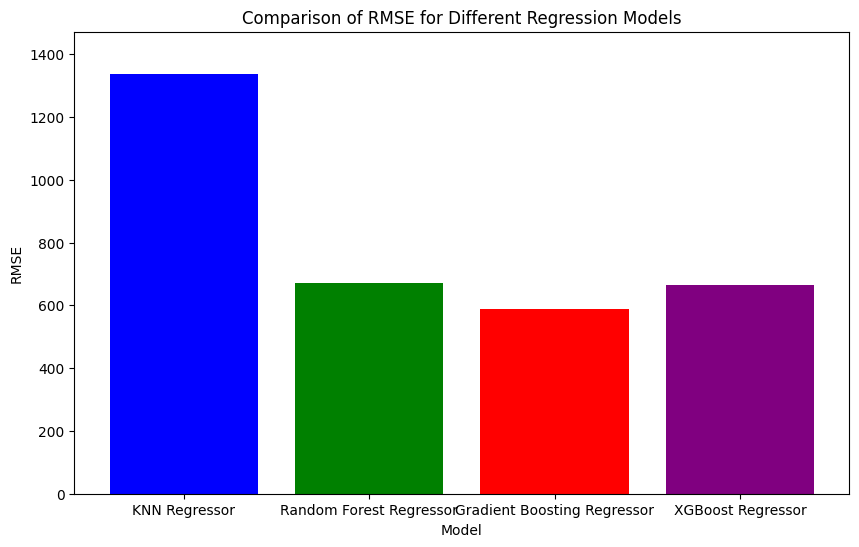

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# Fungsi untuk melatih dan mengevaluasi model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Menguji model-model regresi
knn_reg = KNeighborsRegressor(n_neighbors=5)
rmse_knn = evaluate_model(knn_reg, X_train, X_test, y_train, y_test)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rmse_rf = evaluate_model(rf_reg, X_train, X_test, y_train, y_test)

gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
rmse_gb = evaluate_model(gb_reg, X_train, X_test, y_train, y_test)

xgb_reg = XGBRegressor(n_estimators=100, random_state=42)
rmse_xgb = evaluate_model(xgb_reg, X_train, X_test, y_train, y_test)

# Menyimpan hasil RMSE
models_rmse = {
    'KNN Regressor': rmse_knn,
    'Random Forest Regressor': rmse_rf,
    'Gradient Boosting Regressor': rmse_gb,
    'XGBoost Regressor': rmse_xgb
}

# Memilih model terbaik berdasarkan RMSE
best_model_name = min(models_rmse, key=models_rmse.get)
best_model_rmse = models_rmse[best_model_name]

print(f"Model terbaik adalah {best_model_name} dengan RMSE: {best_model_rmse}")

# Membuat grafik batang
model_names = list(models_rmse.keys())
rmse_values = list(models_rmse.values())

plt.figure(figsize=(10, 6))
plt.bar(model_names, rmse_values, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Regression Models')
plt.ylim(0, max(rmse_values) * 1.1)  # Memberi sedikit ruang di atas batang tertinggi
plt.show()
